<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [1]:
# código
def cargar_txt(_file):
    with open(_file, encoding="UTF-8") as file:
        return file.read().splitlines()
    
def str_to_num(lista):
    float_map = map(float, lista)
    return list(float_map)

def str_to_int(lista):
    float_map = map(int, lista)
    return list(float_map)
    
root = "./Archivos/"
ext = ".txt"
archivos = ["edad", "escolaridad", "estado_civil", "estrato", "genero", "promedio", "region"]
base = {label: cargar_txt(root + label + ext) for label in archivos}
base["edad"] = str_to_int(base["edad"])
base["promedio"] = str_to_num(base["promedio"])

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

edad 
nrow: 500
media: 48.75
mediana: 49.0
desviacion: 18.59
moda: 24   veces_repite: 14

promedio 
nrow: 500
media: 2.62
mediana: 2.7
desviacion: 1.12
moda: 3.0   veces_repite: 37


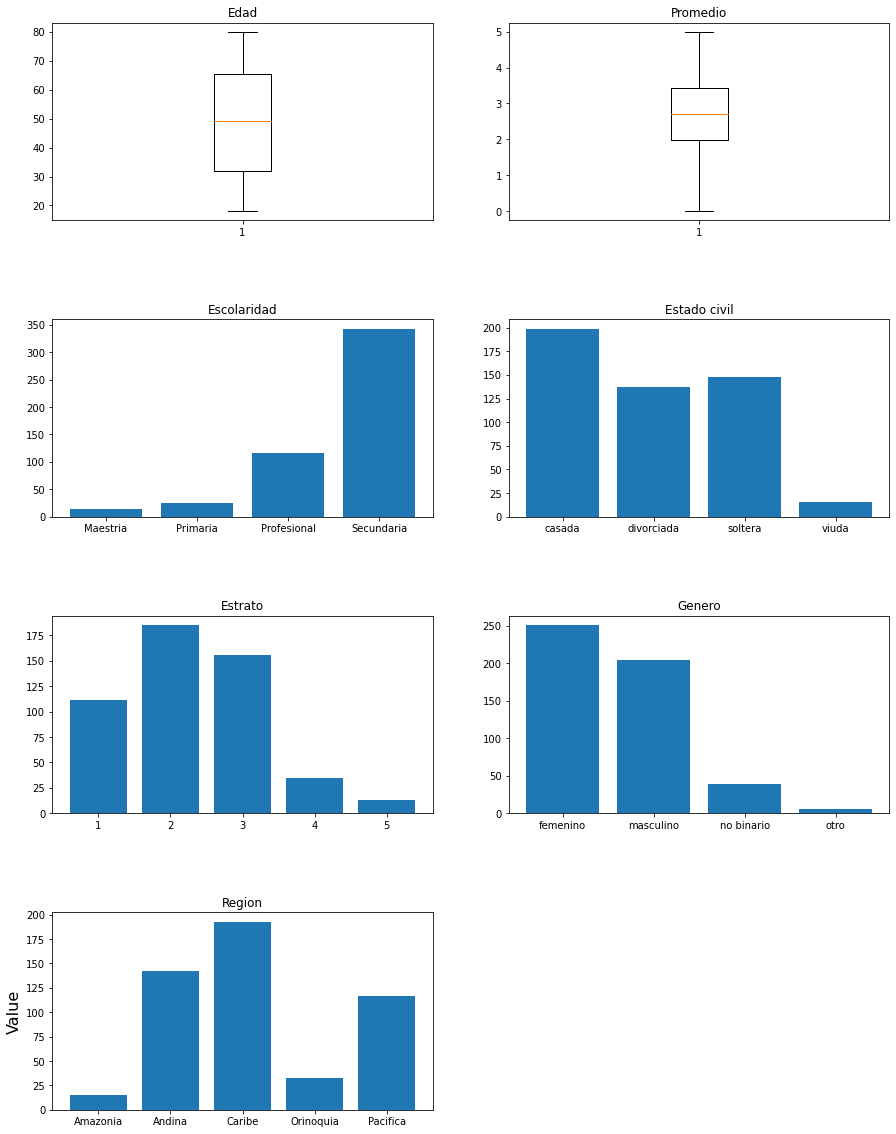

In [2]:
# código

# importación de paquetes necesarios
import matplotlib.pyplot as plt
import math

# función que calcula la mediana de una lista de datos numéricos
def median(l):
    half = len(l) // 2
    sorted_l = sorted(l)
    if not len(l) % 2:
        return (sorted_l[(half - 1)] + sorted_l[(half)]) / 2.0
    return sorted_l[half]

# función que calcula el promedio de una lista de datos numéricos
def mean(l):
    return sum(l) / len(l)
    
# función que calcula la desviación de una lista de datos numéricos
def st_dev(lista):
    mean = sum(lista) / len(lista)
    var = sum((l-mean)**2 for l in lista) / len(lista)
    st_dev = math.sqrt(var)
    return st_dev 

# función que calcula la moda de una lista
def moda(lista):
    conteo = {}
    for valor in lista:
        if valor in conteo:
            conteo[valor] += 1
        else:
            conteo[valor] = 1
    
    max_conteo = 0
    valores = []
    for n in conteo.values():
        if n > max_conteo:
            max_conteo = n
            
    for v, n in conteo.items():
        if n == max_conteo:
            valores.append(v)
            
    return valores, max_conteo


# función para los valores del gráfico de barras
def graf_barras(lista):
    label = sorted(list(set(lista)))
    values = []
    
    conteo = 0
    
    for l in label:
        conteo = lista.count(l)
        values.append(conteo)

    return (label, values)

## Graficos y valores

print('edad ')
print('nrow: '+str(len(base['edad'])))
print('media: '+str(round(mean(base['edad']),2)))
print('mediana: '+str(median(base['edad'])))
print('desviacion: '+str(round(st_dev(base['edad']),2)))
print('moda: '+str(moda(base['edad'])[0][0])+'   veces_repite: '+str(moda(base['edad'])[1]))
print('')
print('promedio ')
print('nrow: '+str(len(base['promedio'])))
print('media: '+str(round(mean(base['promedio']),2)))
print('mediana: '+str(median(base['promedio'])))
print('desviacion: '+str(round(st_dev(base['promedio']),2)))
print('moda: '+str(moda(base['promedio'])[0][0])+'   veces_repite: '+str(moda(base['promedio'])[1]))

fig, (a, b, c, d, e, f, g) = plt.subplots(nrows=1, ncols=7,figsize=(15, 20))

grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.5)

a = plt.subplot(grid[0, 0])
b = plt.subplot(grid[0, 1:])
c = plt.subplot(grid[1, :1])
d = plt.subplot(grid[1, 1:])
e = plt.subplot(grid[2, :1])
f = plt.subplot(grid[2, 1:])
g = plt.subplot(grid[3, :1])

a.boxplot(base['edad'])
a.set_title("Edad")
b.boxplot(base['promedio'])
b.set_title("Promedio")
c.bar(graf_barras(base['escolaridad'])[0], graf_barras(base['escolaridad'])[1], align='center')
c.set_title("Escolaridad")
d.bar(graf_barras(base['estado_civil'])[0], graf_barras(base['estado_civil'])[1], align='center')
d.set_title("Estado civil")
e.bar(graf_barras(base['estrato'])[0], graf_barras(base['estrato'])[1], align='center')
e.set_title("Estrato")
f.bar(graf_barras(base['genero'])[0], graf_barras(base['genero'])[1], align='center')
f.set_title("Genero")
g.bar(graf_barras(base['region'])[0], graf_barras(base['region'])[1], align='center')
g.set_title("Region")

plt.ylabel("Value", size = 16)

plt.show()

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [3]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = 'La organización está preocupada por identificar la mejor alternativa para seleccionar la población'\
                    'beneficiaria del programa de becas'

pregunta_analytics = 'Cuáles son las características de la población seleccionada con cada alternativa y como se comparan'\
                      'entre si para poder tomar   una decisión'

print("Pregunta de negocio: ")
print(pregunta_negocio)
print("")
print("Pregunta Analytics: ")
print(pregunta_analytics)

Pregunta de negocio: 
La organización está preocupada por identificar la mejor alternativa para seleccionar la poblaciónbeneficiaria del programa de becas

Pregunta Analytics: 
Cuáles son las características de la población seleccionada con cada alternativa y como se comparanentre si para poder tomar   una decisión


**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [4]:
# código
'''
Se define una cantidad por estrato, y se toma ordenadamente los alumnos que cumplan el requisito 
hasta completar la cantidad; esto se repite para cada estrato, y se retorna al primer grupo si no se 
ha completado el total de las becas a asignar.
'''

def alternativa_1(base, becas, porcentaje):
    grupo = "estrato"
    if porcentaje <= 0:
        return {}
    
    grupos = {}
    for indice, grupo_promedio in enumerate(zip(base[grupo], base["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((indice, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(indice, grupo_promedio[1])]
    
    sorted_grupos = sorted(grupos)
    becados = set()
    
    while len(becados) < becas:
        becas_a_asignar = 0
        for grupo in sorted_grupos:
            promedios = [p[1] for p in grupos[grupo]]
            media_grupo = mean(promedios)
            disponibilidad = math.floor(len(promedios) * porcentaje)
            if disponibilidad > 0:
                becados_grupo = 0
                # arbitrariamente decido que hay prioridad en los mejores promedios
                alumnos_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for alumno in alumnos_sorted:
                    if alumno[0] not in becados and alumno[1] > media_grupo:
                        becas_a_asignar += 1
                        becados_grupo += 1
                        becados.add(alumno[0])
                        if len(becados) >= becas or becados_grupo >= disponibilidad:
                            break
                    if alumno[1] <= media_grupo:
                        break
            if len(becados) >= becas:
                break
        if becas_a_asignar == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    base_alt1 = {}
    for label, valores in base.items():
        base_alt1[label] = [v for i, v in enumerate(valores) if i in becados]
    
    return base_alt1

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [5]:
# código
'''
De acuerdo con el lineamiento del cliente, se requiere que para cada región tenga la misma participación en el total de becas
a asignar, y que dentro de cada una de ellas, cada categoría de genero tenga la misma participación; siempre utilizando para 
la selección los mejores promedios
'''
def conteo(lista):
    conteo = {}
    for valor in lista:
        if valor in conteo:
            conteo[valor] += 1
        else:
            conteo[valor] = 1
    return conteo

def alternativa_2(base, becas, prop_region, prop_genero):
    regiones = conteo(base["region"])
    generos = conteo(base["genero"])

    grupos = {}
    for llave, grupo_promedio in enumerate(zip(base["region"], base["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((llave, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(llave, grupo_promedio[1])]
            
    becados = set()
    
    while len(becados) < becas:
        becas_a_asignar = 0
        for grupo in grupos:
            promedios = [p[1] for p in grupos[grupo]]
            disponibilidad = math.floor(len(promedios) * prop_region[grupo])
            if disponibilidad > 0:
                becados_grupo = 0
                alumnos_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for alumno in alumnos_sorted:
                    becados_subgrupo = 0
                    for genero in generos.keys():
                        disponibilidad_2 = math.floor(disponibilidad * prop_genero[genero])
                        if disponibilidad_2 > 0:
                            if alumno[0] not in becados:
                                if base["genero"][alumno[0]] == genero:
                                    becas_a_asignar += 1
                                    becados_subgrupo += 1
                                    becados_grupo += 1
                                    becados.add(alumno[0])
                                    if len(becados) >= becas or becados_subgrupo >= disponibilidad_2 or becados_grupo >= disponibilidad:
                                        break
                    if len(becados) >= becas or becados_grupo >= disponibilidad:
                        break
            if len(becados) >= becas:
                break
        if becas_a_asignar == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    base_alt2 = {}
    for label, valores in base.items():
        base_alt2[label] = [v for i, v in enumerate(valores) if i in becados]
        
    return base_alt2

In [6]:
# código
'''
De acuerdo con el lineamiento del cliente, se requiere que para cada región tenga la misma participación en el total de becas
a asignar, y que dentro de cada una de ellas, cada categoría de genero tenga la misma participación; siempre utilizando para 
la selección los mejores promedios
'''
def conteo(lista):
    conteo = {}
    for valor in lista:
        if valor in conteo:
            conteo[valor] += 1
        else:
            conteo[valor] = 1
    return conteo

def alternativa_2(base, becas, prop_region, prop_genero):
    regiones = conteo(base["region"])
    generos = conteo(base["genero"])

    grupos = {}
    for llave, grupo_promedio in enumerate(zip(base["region"], base["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((llave, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(llave, grupo_promedio[1])]
            
    becados = set()
    
    while len(becados) < becas:
        becas_a_asignar = 0
        for grupo in grupos:
            promedios = [p[1] for p in grupos[grupo]]
            disponibilidad = math.floor(becas * prop_region[grupo])
            if disponibilidad > 0:
                becados_grupo = 0
                alumnos_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for alumno in alumnos_sorted:
                    becados_subgrupo = 0
                    for genero in generos.keys():
                        disponibilidad_2 = math.floor(disponibilidad * prop_genero[genero])
                        if disponibilidad_2 > 0:
                            if alumno[0] not in becados:
                                if base["genero"][alumno[0]] == genero:
                                    
                                    becas_a_asignar += 1
                                    becados_subgrupo += 1
                                    becados_grupo += 1
                                    becados.add(alumno[0])
                        if len(becados) >= becas or becados_subgrupo >= disponibilidad_2 or becados_grupo >= disponibilidad:
                            break
                    if len(becados) >= becas or becados_grupo >= disponibilidad:
                        break
            if len(becados) >= becas:
                break
        if becas_a_asignar == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    base_alt2 = {}
    for label, valores in base.items():
        base_alt2[label] = [v for i, v in enumerate(valores) if i in becados]
        
    return base_alt2

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [7]:
# código

# Agrupar estadisticas
## La media, mediana y la desviación estándar aplicarían solo para valores numéricos.

def estadisticas(base, continuos):
    estadisticas = {}
    for label, lista in base.items():
        if label in continuos:
            _media = round(mean(lista), 2)
            _mediana = round(median(lista), 2)
            _sd = round(st_dev(lista), 2)
        else:
            _media = ""
            _mediana = ""
            _sd = ""
        _moda = moda(lista)
        estadisticas[label] = {
            "media": _media,
            "desv_est": _sd,
            "mediana": _mediana,
            "moda": _moda[0],
            "veces moda": _moda[1]
        }
    
    tabla = []
    medida = ["variable", "media", "desv_est", "mediana", "moda", "veces moda"]
    tabla.append(medida)
    for variable, valor in estadisticas.items():
        row = [variable,
               str(valor["media"]),
               str(valor["desv_est"]),
               str(valor["mediana"]),
               str(valor["moda"][0]),
               str(valor["veces moda"])]
        tabla.append(row)
    for row in tabla:
        print("{: >15} {: >15} {: >15} {: >15} {: >15} {: >15}".format(*row))

# automatizar los graficos
## variables numericas tienen grafico boxplot, las demás de barras

def grafico(data, box_plot=False, label = 'Var'):
    if box_plot:
        plt.boxplot(data)
        plt.xlabel(label)
    else:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        datos = graf_barras(data)
        ax.bar(datos[0], datos[1])
        plt.xlabel(label)    
    plt.show()
    
def grilla_graficos(base):
    grafico(base["edad"], box_plot=True, label='Edad')
    grafico(base["promedio"], box_plot=True, label='Promedio')
    grafico(base["escolaridad"], label='Escolaridad')
    grafico(base["estado_civil"], label='Estado civil')
    grafico(base["estrato"], label='Estrato')
    grafico(base["genero"], label='Genero')
    grafico(base["region"], label='Región')    

----------- Alternativa 1: Acumulativo por Estrato -----------
       variable           media        desv_est         mediana            moda      veces moda
           edad           50.91            18.0              54              54               5
    escolaridad                                                      Secundaria              47
   estado_civil                                                          casada              34
        estrato                                                               2              28
         genero                                                        femenino              37
       promedio            4.19            0.38             4.0             4.0              14
         region                                                          Caribe              25
Total: 75
----------- Alternativa 2: Igualmente distribuido por Region y Genero -----------
       variable           media        desv_est         mediana            mo

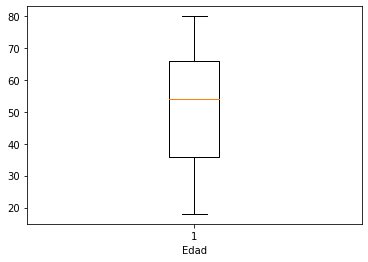

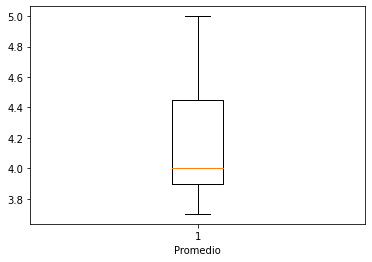

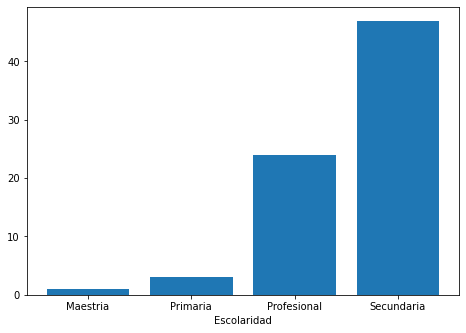

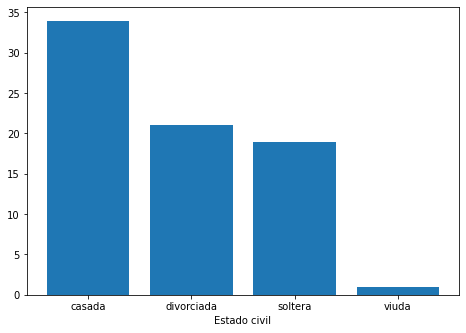

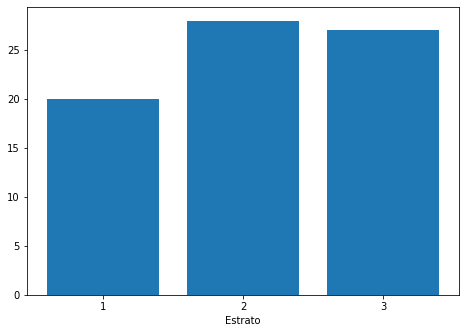

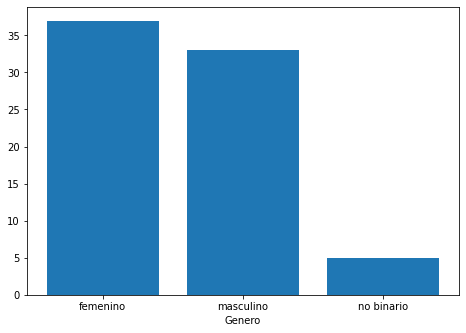

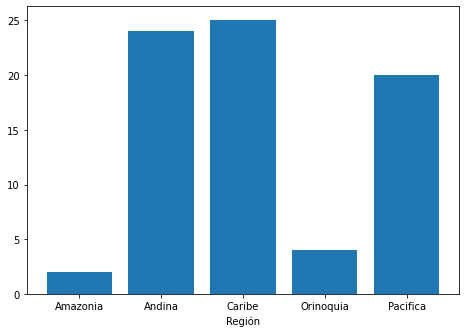

----------- Graficos Alternativa 2 -----------


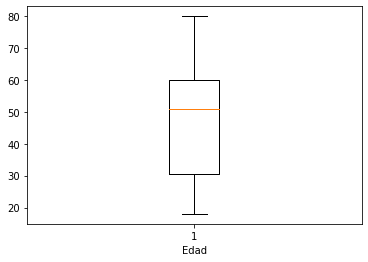

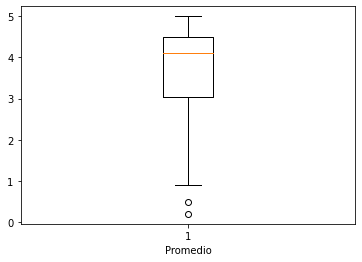

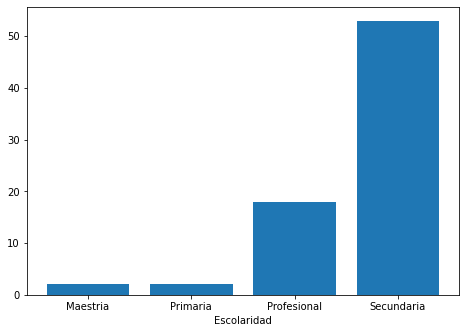

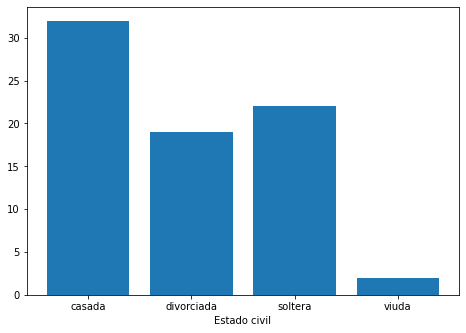

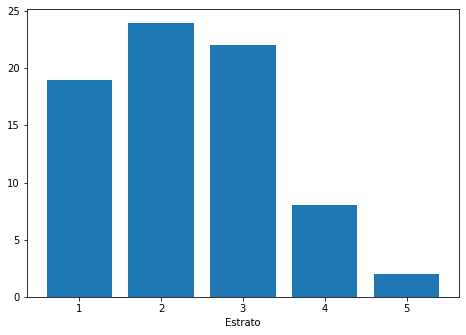

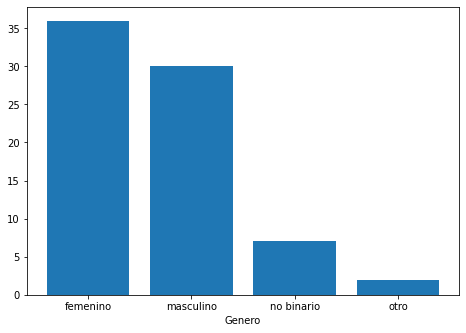

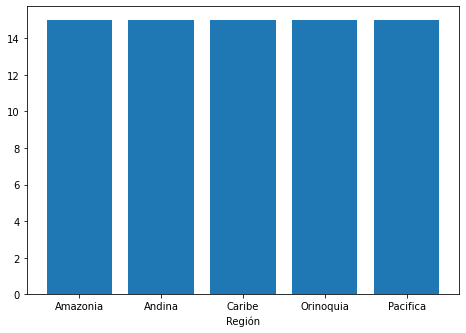

In [8]:
# IMPLEMENTACION DE LAS ALTERNATIVAS

## para calcular la proporción
def prop(lista):
    label = sorted(list(set(lista)))
    values = []
    
    conteo = 0
    
    for l in label:
        values.append(1/len(label))

    return dict(zip(label, values))

def prop2(lista):
    label = sorted(list(set(lista)))
    values = []
    
    conteo = 0
    
    for l in label:
        conteo = lista.count(l)
        values.append(conteo/len(lista))

    return dict(zip(label, values))

## Ejecutar codigos

n = 75

alt_1 = alternativa_1(base, n, 0.02)

prop_region = prop(base['region'])
prop_genero = prop(base['genero'])

alt_2 = alternativa_2(base, n, prop_region, prop_genero)

## Comparación

continuas = {"edad","promedio"}

def comparacion(alt_1, alt_2):
    print('----------- Alternativa 1: Acumulativo por Estrato -----------')
    estadisticas(alt_1,continuas)
    print('Total: {}'.format(len(alt_1["promedio"])))
    
    print('----------- Alternativa 2: Igualmente distribuido por Region y Genero -----------')
    estadisticas(alt_2,continuas)
    print('Total: {}'.format(len(alt_2["promedio"])))
    
    
    print('----------- Graficos Alternativa 1 -----------')
    grilla_graficos(alt_1)
    
    print('----------- Graficos Alternativa 2 -----------')
    grilla_graficos(alt_2)

comparacion(alt_1, alt_2)

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [12]:
# código

def herramienta(base, becas, edades, variable, prop_variable):
    
    base_edad = base.copy()
    if edades != None:
        aplican = {estudiante for estudiante, edad in enumerate(base_edad["edad"]) if edades[0] <= edad <= edades[1]}
        for label, valores in base_edad.items():
            base_edad[label] = [v for e, v in enumerate(valores) if e in aplican]
    
    
    grupos = {}
    for llave, grupo_promedio in enumerate(zip(base_edad[variable], base_edad["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((llave, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(llave, grupo_promedio[1])]
            
    becados = set()
    
    while len(becados) < becas:
        becas_a_asignar = 0
        for grupo in grupos:
            promedios = [p[1] for p in grupos[grupo]]
            disponibilidad = math.floor(becas * prop_variable[grupo])
            if disponibilidad > 0:
                becados_grupo = 0
                alumnos_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for alumno in alumnos_sorted:
                    if alumno[0] not in becados:
                        becas_a_asignar += 1
                        becados_grupo += 1
                        becados.add(alumno[0])
                    if len(becados) >= becas or becados_grupo >= disponibilidad:
                        break
            if len(becados) >= becas:
                break
        if becas_a_asignar == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    base_edad_herramienta = {}
    for label, valores in base_edad.items():
        base_edad[label] = [v for i, v in enumerate(valores) if i in becados]
        
    return base_edad_herramienta    

**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [18]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'El propósito de una beca es apoyar el proceso de formación de personas con alto nivel académico y con' \
            'dificultades para cubrir  por cuenta propia los costos del programa educativo; por lo que mi propuesta sería' \
            'realizar una asiganción regresiva por estrato - a mayor estrato menor participación en las becas a asignar -,' \
            'manteniendo el criterio de selección dentro del estrato por los mejores promedios.'

print("Propuesta: ")
print(respuesta)

Propuesta: 
El propósito de una beca es apoyar el proceso de formación de personas con alto nivel académico y condificultades para cubrir  por cuenta propia los costos del programa educativo; por lo que mi propuesta seríarealizar una asiganción regresiva por estrato - a mayor estrato menor participación en las becas a asignar -,manteniendo el criterio de selección dentro del estrato por los mejores promedios


**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:
# código

conclusion = ''

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21